In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [2]:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    x1, x2 = np.meshgrid(xx, yy)
    X_grid = np.c_[x1.ravel(), x2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(x1, 
                    x2, 
                    decision_values.reshape(x1.shape), 
                    levels=fill_levels, 
                    colors=['cyan', 'pink', 'yellow'])
    if line:
        ax.contour(x1, 
                   x2, 
                   decision_values.reshape(x1.shape), 
                   levels=levels, 
                   colors='black')

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [3]:
X, y = make_moons(n_samples=1000, shuffle=True, noise=0.25, random_state=41)

In [4]:
print('Координаты точек: ')
print(X[:15])
print('Метки класса: ')
print(y[:15])

Координаты точек: 
[[ 2.43925858e-01  8.64335729e-01]
 [ 2.16565685e-01  7.74035450e-02]
 [ 1.86240848e+00 -3.74002484e-01]
 [-9.75022520e-01  9.62516559e-02]
 [ 2.45733769e-01 -1.20800098e-01]
 [ 2.26162888e+00  8.10738624e-01]
 [ 1.08713469e-01  2.16517085e-01]
 [-3.61582169e-01  9.36581439e-01]
 [-7.04683882e-01  4.85704886e-01]
 [ 1.48133028e+00 -1.31269733e-03]
 [-3.99966999e-01  1.34289554e+00]
 [-4.68160123e-01  1.24150659e+00]
 [ 1.41350790e+00 -1.51963621e-01]
 [ 5.99243888e-01  7.13687210e-01]
 [ 1.91390078e+00  5.42106080e-01]]
Метки класса: 
[0 1 1 0 1 1 1 0 0 1 0 0 1 0 1]


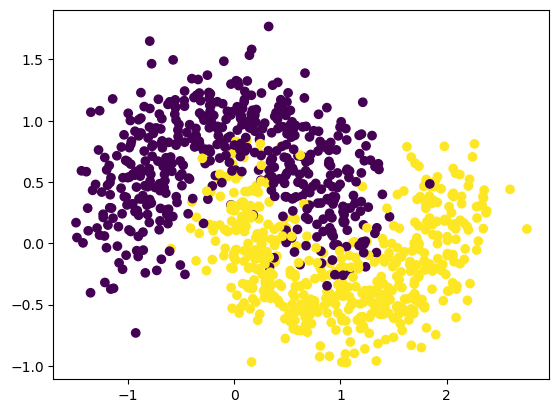

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.10,
                                                    random_state=41)

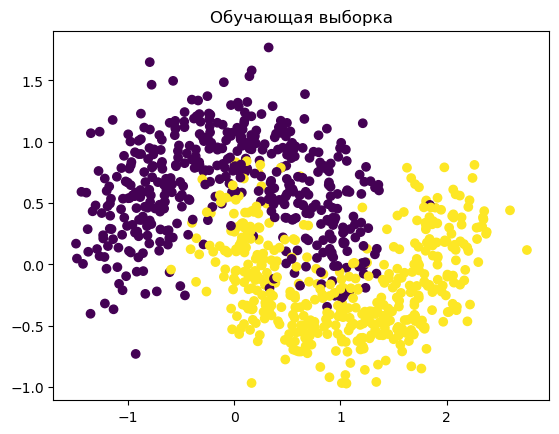

In [7]:
plt.title('Обучающая выборка')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

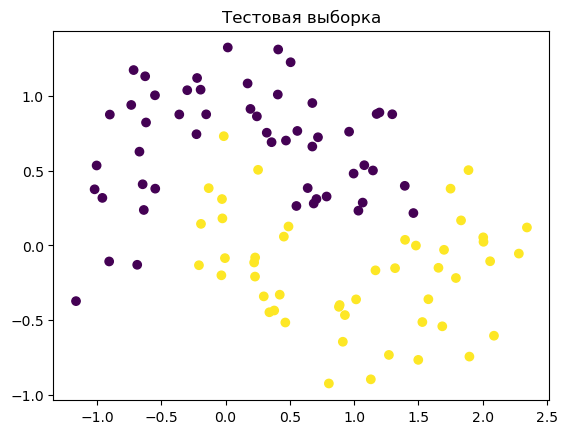

In [8]:
plt.title('Тестовая выборка')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [10]:
def show_info(classifier, classifier_name, real_values, prediction_values):
    print(f'Метод классификации: {classifier_name}\n')

    print('Предсказанные и реальные значения:')
    print(prediction_values)
    print(real_values)

    print('\nМатрица неточностей')
    print(confusion_matrix(real_values, prediction_values))

    print(f'\nТочность классификации: {accuracy_score(prediction_values, real_values)}')

    print('\nПолнота: ')
    print(classification_report(real_values, prediction_values))

    print(f'\nПлощадь под кривой: {roc_auc_score(real_values, prediction_values)}')

    plt.xlabel('Первый класс')
    plt.ylabel('Второй класс')
    plt.title(classifier_name.upper())
    plot_2d_separator(classifier, X, fill=True)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

Метод классификации: ближайшие соседи (1)

Предсказанные и реальные значения:
[0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1]
[0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0]

Матрица неточностей
[[46  6]
 [ 5 43]]

Точность классификации: 0.89

Полнота: 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        52
           1       0.88      0.90      0.89        48

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100


Площадь под кривой: 0.890224358974359


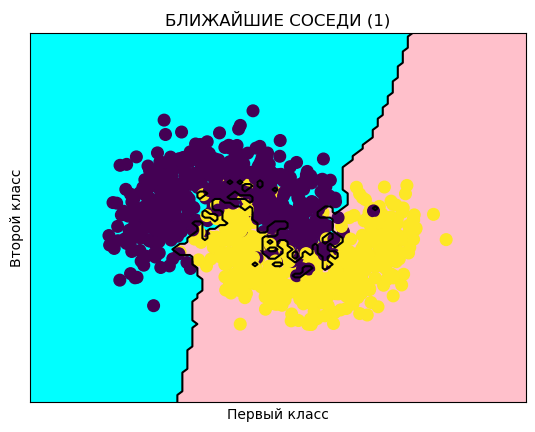

In [12]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

show_info(knn, 'ближайшие соседи (1)', y_test, prediction)

Метод классификации: ближайшие соседи (3)

Предсказанные и реальные значения:
[0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1]
[0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0]

Матрица неточностей
[[47  5]
 [ 4 44]]

Точность классификации: 0.91

Полнота: 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.90      0.92      0.91        48

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100


Площадь под кривой: 0.9102564102564101


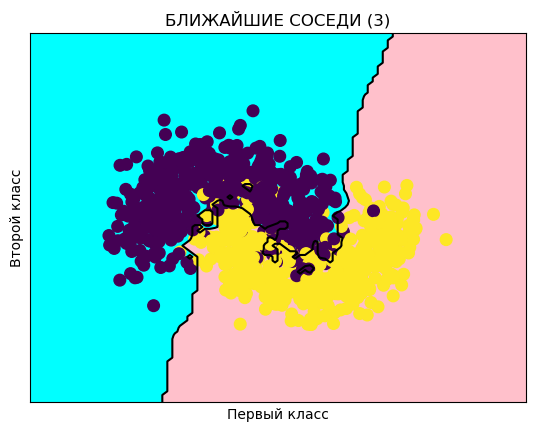

In [13]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

show_info(knn, 'ближайшие соседи (3)', y_test, prediction)

Метод классификации: ближайшие соседи (5)

Предсказанные и реальные значения:
[0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0]
[0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0]

Матрица неточностей
[[49  3]
 [ 4 44]]

Точность классификации: 0.93

Полнота: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.94      0.92      0.93        48

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Площадь под кривой: 0.9294871794871794


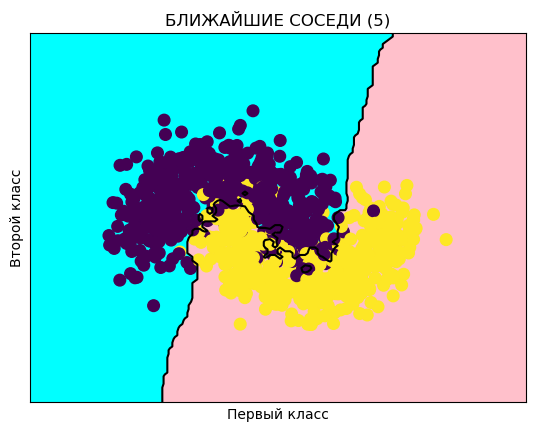

In [14]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

show_info(knn, 'ближайшие соседи (5)', y_test, prediction)

Метод классификации: ближайшие соседи (9)

Предсказанные и реальные значения:
[0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0]
[0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0]

Матрица неточностей
[[51  1]
 [ 1 47]]

Точность классификации: 0.98

Полнота: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.98      0.98      0.98        48

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


Площадь под кривой: 0.9799679487179486


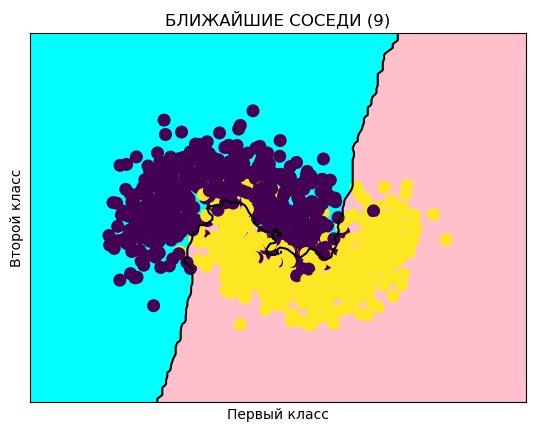

In [15]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

show_info(knn, 'ближайшие соседи (9)', y_test, prediction)

Метод классификации: Наивный байесовский классификатор

Предсказанные и реальные значения:
[0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1
 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1]
[0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0]

Матрица неточностей
[[43  9]
 [ 6 42]]

Точность классификации: 0.85

Полнота: 
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        52
           1       0.82      0.88      0.85        48

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100


Площадь под кривой: 0.8509615384615384


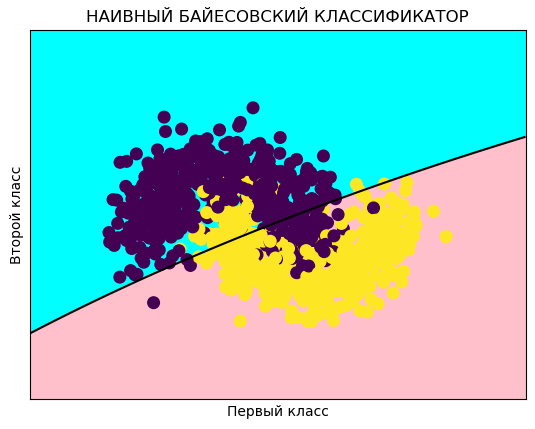

In [16]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

prediction = nb.predict(X_test)

show_info(nb, 'Наивный байесовский классификатор', y_test, prediction)

In [17]:
from sklearn.ensemble import RandomForestClassifier

Метод классификации: случайный лес (5)

Предсказанные и реальные значения:
[0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1]
[0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0]

Матрица неточностей
[[49  3]
 [ 4 44]]

Точность классификации: 0.93

Полнота: 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.94      0.92      0.93        48

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Площадь под кривой: 0.9294871794871794


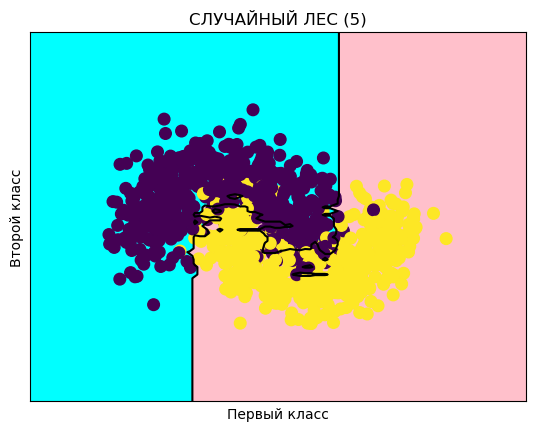

In [18]:
rfc = RandomForestClassifier(n_estimators=5)

rfc.fit(X_train, y_train)

prediction = rfc.predict(X_test)

show_info(rfc, 'случайный лес (5)', y_test, prediction)

Метод классификации: случайный лес (10)

Предсказанные и реальные значения:
[0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1]
[0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0]

Матрица неточностей
[[48  4]
 [ 4 44]]

Точность классификации: 0.92

Полнота: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        52
           1       0.92      0.92      0.92        48

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100


Площадь под кривой: 0.9198717948717948


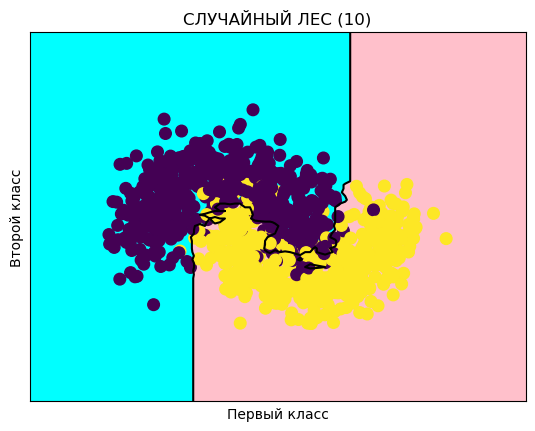

In [19]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)

prediction = rfc.predict(X_test)

show_info(rfc, 'случайный лес (10)', y_test, prediction)

Метод классификации: случайный лес (15)

Предсказанные и реальные значения:
[0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1]
[0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0]

Матрица неточностей
[[48  4]
 [ 2 46]]

Точность классификации: 0.94

Полнота: 
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.92      0.96      0.94        48

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Площадь под кривой: 0.9407051282051283


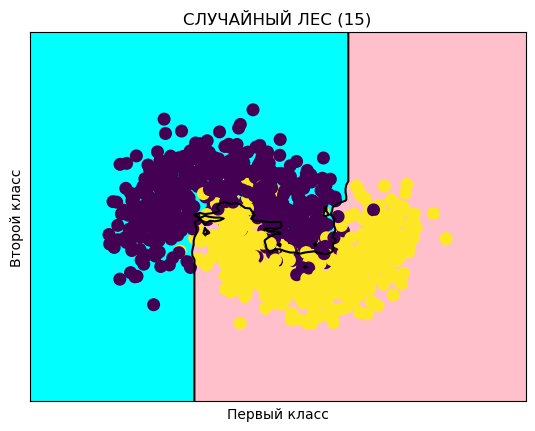

In [20]:
rfc = RandomForestClassifier(n_estimators=15)

rfc.fit(X_train, y_train)

prediction = rfc.predict(X_test)

show_info(rfc, 'случайный лес (15)', y_test, prediction)

Метод классификации: случайный лес (20)

Предсказанные и реальные значения:
[0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1]
[0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0]

Матрица неточностей
[[49  3]
 [ 3 45]]

Точность классификации: 0.94

Полнота: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.94      0.94      0.94        48

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Площадь под кривой: 0.9399038461538461


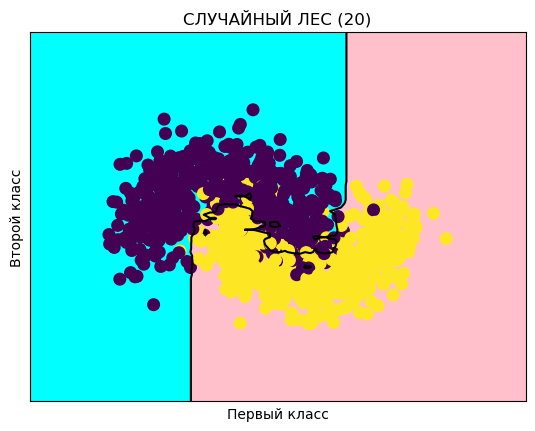

In [21]:
rfc = RandomForestClassifier(n_estimators=20)

rfc.fit(X_train, y_train)

prediction = rfc.predict(X_test)

show_info(rfc, 'случайный лес (20)', y_test, prediction)

Метод классификации: случайный лес (50)

Предсказанные и реальные значения:
[0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1]
[0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0]

Матрица неточностей
[[49  3]
 [ 3 45]]

Точность классификации: 0.94

Полнота: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.94      0.94      0.94        48

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Площадь под кривой: 0.9399038461538461


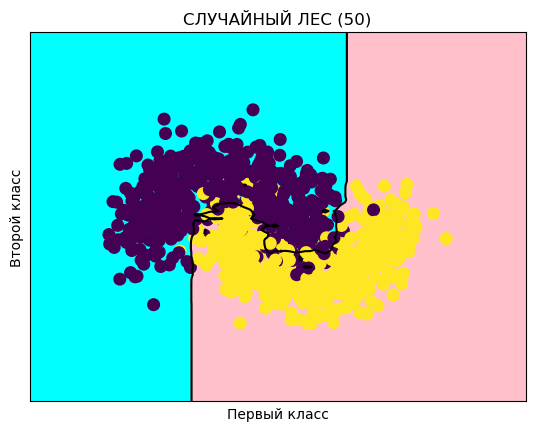

In [22]:
rfc = RandomForestClassifier(n_estimators=50)

rfc.fit(X_train, y_train)

prediction = rfc.predict(X_test)

show_info(rfc, 'случайный лес (50)', y_test, prediction)